In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [173]:
df = pd.read_csv('house_data_set_cleaned_2.csv')

In [174]:
#df.query("Location == 'Athurugiriya' and Price == 13500000 and  Beds == 3 and Baths == 3 and `House Size` == 1650.0 and `Land Size` == 10.0 ")

Find duplicates

In [175]:
#df[df[['Location', 'Price', 'Beds', 'Baths', 'House Size', 'Land Size']].duplicated() == True].query("Location == 'Athurugiriya' and Price == 13500000 and  Beds == 3 and Baths == 3 and `House Size` == 1650.0 and `Land Size` == 10.0 ")

In [176]:
df = df.drop(df[df[['Location', 'Price', 'Beds', 'Baths', 'House Size', 'Land Size']].duplicated() == True].index, axis=0)

In [177]:
df.shape

(5507, 7)

In [178]:
labelencoder = LabelEncoder()
df['Location'] = labelencoder.fit_transform(df['Location'])
# df['Location'].apply(lambda x: print(x))


In [179]:
df.head()

,Unnamed: 0,Location,Price,Beds,Baths,House Size,Land Size
0,0,35,12500000,4,2,1750.0,6.5
1,1,25,29500000,4,4,3510.0,9.0
2,2,28,19000000,4,3,2850.0,7.5
3,3,25,35000000,7,4,1700.0,15.0
4,4,4,29500000,5,4,3500.0,8.0


In [180]:
df_beds_baths = pd.concat([df['Beds'], df['Baths']], axis=1)

In [181]:
km = KMeans(
    n_clusters=2,
    init= 'random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
y_km = km.fit_predict(df_beds_baths)

In [182]:
y_km == 2

array([False, False, False, ..., False, False, False])

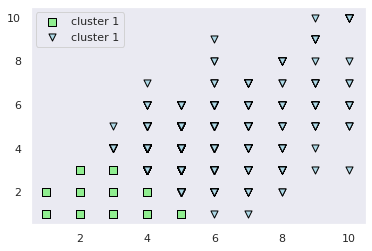

In [183]:
plt.scatter(
    df_beds_baths[y_km == 0]['Beds'],
    df_beds_baths[y_km == 0]['Baths'],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='black',
    label='cluster 1'
)


plt.scatter(
    df_beds_baths[y_km == 1]['Beds'],
    df_beds_baths[y_km == 1]['Baths'],
    s=50,
    c='lightblue',
    marker='v',
    edgecolor='black',
    label='cluster 1'
)

# plt.scatter(
#     df_beds_baths[y_km == 2]['Beds'],
#     df_beds_baths[y_km == 2]['Baths'],
#     s=50,
#     c='orange',
#     marker='*',
#     edgecolor='black',
#     label='cluster 1'
# )


plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [184]:
df_beds_price = pd.concat([df['Beds'], df['Price']], axis=1) 

In [185]:
km = KMeans(
    n_clusters=3,
    init= 'random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
y_km = km.fit_predict(df_beds_price)

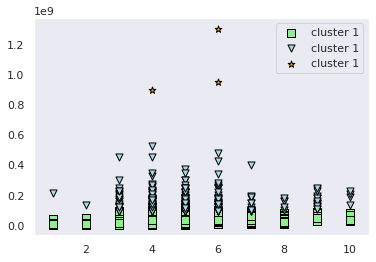

In [186]:
plt.scatter(
    df_beds_price[y_km == 0]['Beds'],
    df_beds_price[y_km == 0]['Price'],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='black',
    label='cluster 1'
)


plt.scatter(
    df_beds_price[y_km == 1]['Beds'],
    df_beds_price[y_km == 1]['Price'],
    s=50,
    c='lightblue',
    marker='v',
    edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    df_beds_price[y_km == 2]['Beds'],
    df_beds_price[y_km == 2]['Price'],
    s=50,
    c='orange',
    marker='*',
    edgecolor='black',
    label='cluster 1'
)


plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [187]:
df_temp = df[df['House Size'] < 12000]
df_temp = df_temp[df_temp['Land Size'] < 800]

In [188]:
colors = ['blue', 'green', 'yellow', 'red', 'orange', 'magenta', 'cyan', 'indigo', 'brown', 'olive']

In [189]:
# df_houssize_price = pd.concat([df['House Size'], df['Price']], axis=1)
df_houssize_price = pd.concat([df_temp['House Size'], df_temp['Price']], axis=1)

# df_houssize_price = df_houssize_price['House Size']]
df_houssize_price.head()

,House Size,Price
0,1750.0,12500000
1,3510.0,29500000
2,2850.0,19000000
3,1700.0,35000000
4,3500.0,29500000


NameError: name 'df_houssize' is not defined

In [203]:
model = RandomForestRegressor(n_jobs=-1)
for index, color in enumerate(colors):
    km = KMeans(
    n_clusters=index+1,
    init= 'random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
    )
    y_km = km.fit_predict(df_houssize_price)
    for i in np.arange(index+1):
#          plt.scatter(
#             df_houssize_price[y_km == i]['House Size'],
#             df_houssize_price[y_km == i]['Price'],
#             s=50,
#             c=colors[i],
#             marker='s',
#             edgecolor='black',
#             label='cluster ' + str(i + 1))
            #  SPLit the data
         X_train, X_test, Y_train, Y_test = train_test_split(
            df.loc[df_houssize_price.index].drop(columns=['Unnamed: 0', 'Price'],axis=1)[y_km == i],
            df.loc[df_houssize_price.index]['Price'][y_km == i],
            test_size=0.25,
            random_state=42
            )
         # build random forest
         estimators = np.arange(10, 400, 10)
         scores = []
         for n in estimators:
            model.set_params(n_estimators=n)
            model.fit(X_train, Y_train)
            scores.append(model.score(X_test, Y_test))
         print("clusters: " + str(index +1) + " cluster: " + str(i) + " max score: " + str(np.array(scores).max()))
         print("---------------------------------------------------")
         print(scores)
         print('----------------------------------------------------')
#          plt.title('Random Forest Score with diffent n estimators ' + str(index+1) + " cluster: " + str(i))
#          plt.plot(estimators, scores)
    #  
#     plt.legend(scatterpoints=1)
#     plt.grid()
#     plt.show()
    print('####################################################################################')
    fig = plt.figure()

clusters: 1 cluster: 0 max score: 0.36232904117108866
---------------------------------------------------
[0.21485463781796366, 0.35547633448685134, 0.28981148002146473, 0.34673456340753206, 0.36232904117108866, 0.3431801042544992, 0.3046887331408821, 0.3028390975562858, 0.32783305187348444, 0.2998908620738283, 0.31752990109260104, 0.329796221780299, 0.34712212854740954, 0.3008656525103732, 0.29764197393614455, 0.319331226804917, 0.28096502720062644, 0.3437952000411675, 0.2984133494145794, 0.3194611278763987, 0.3396861088686416, 0.3125709352402213, 0.31261018047046507, 0.3257858930304157, 0.3147132126105342, 0.35119710238246304, 0.3036339089162756, 0.35615656224474834, 0.3095274881788498, 0.3406569277259692, 0.315159329212344, 0.3399453332928273, 0.30845251792829065, 0.3454943865888369, 0.3129689455567616, 0.32605465826459157, 0.30154372788334016, 0.3460832179924078, 0.31059526077028476]
----------------------------------------------------
##############################################

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning

clusters: 4 cluster: 3 max score: nan
---------------------------------------------------
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
----------------------------------------------------
####################################################################################
clusters: 5 cluster: 0 max score: 0.4284731234652232
---------------------------------------------------
[0.2925564314243414, 0.32236181774495154, 0.34672816111465454, 0.36808398644370893, 0.3337068043889817, 0.3883022254016961, 0.34954901665316496, 0.4099145707553569, 0.3988482257305047, 0.40878369685399174, 0.40482364232793433, 0.3691005700684133, 0.387900179965242, 0.4009895727283125, 0.3844738233242461, 0.3877685786805492, 0.407166909594689, 0.4013448642435669, 0.40832792571290166, 0.3803294303399181, 0.4284731234652232, 0.3722311853583302, 0.38505890334919035, 0.42

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning

clusters: 5 cluster: 3 max score: nan
---------------------------------------------------
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
----------------------------------------------------
clusters: 5 cluster: 4 max score: 0.41036153445884693
---------------------------------------------------
[0.2999769579556094, 0.39755439236549756, 0.3793178082630315, 0.3601152262874122, 0.38788359422073937, 0.3956005267601427, 0.4010961790194175, 0.3887818155857513, 0.39607153282798535, 0.4025864143326176, 0.4065444158898922, 0.4036438277527525, 0.4006817885684089, 0.40242101148515397, 0.3989460686753293, 0.4002507081146464, 0.4091155179018, 0.4009182639700897, 0.4048217391855673, 0.39815228842237504, 0.39772600883443227, 0.3990477463420502, 0.40170371261082105, 0.4018254409243246, 0.39573932812011203, 0.40543346379439327, 0.3985394918050352, 0.407043

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning

clusters: 6 cluster: 3 max score: nan
---------------------------------------------------
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
----------------------------------------------------
clusters: 6 cluster: 4 max score: 0.24499847162483324
---------------------------------------------------
[0.157462197316949, 0.18338396616614047, 0.23937914199988042, 0.19997035329052548, 0.1803168898691638, 0.20384081205562377, 0.21228255548568686, 0.2224936694098352, 0.22005195144915013, 0.21725791691400687, 0.20181260884257202, 0.24499847162483324, 0.21647639390561443, 0.22605056525083103, 0.21009829933661087, 0.20964301502688842, 0.22203841951323489, 0.22119403187654008, 0.2142951423027338, 0.20562690565782538, 0.21585249004641802, 0.22566316958599833, 0.22288181533492912, 0.21730054404378207, 0.21284846523010148, 0.2190332740969333, 0.203999662863

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning

clusters: 7 cluster: 3 max score: nan
---------------------------------------------------
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
----------------------------------------------------
clusters: 7 cluster: 4 max score: 0.15148120988328873
---------------------------------------------------
[0.06578597335027392, 0.09610684363675503, 0.11587883278663258, 0.09359997141957277, 0.12396406682588068, 0.09096822971771235, 0.10637911205746575, 0.10412615009984694, 0.13413896513480728, 0.1506883888142222, 0.09797611676427176, 0.1456793553494229, 0.13437577506511522, 0.1439523163231321, 0.1250602240116907, 0.12928146225469284, 0.15148120988328873, 0.14570522103367367, 0.12994685293400987, 0.12836720103356603, 0.11542503231829115, 0.11604039314078562, 0.14949111304209184, 0.12881627921704786, 0.12699281542006569, 0.13678487894343216, 0.1316945626

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning

clusters: 8 cluster: 3 max score: nan
---------------------------------------------------
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
----------------------------------------------------
clusters: 8 cluster: 4 max score: 0.21112902768701935
---------------------------------------------------
[0.11837598509472658, 0.11680827218924439, 0.1846563009629133, 0.18866916341188622, 0.20049147889644836, 0.19518687025937564, 0.21112902768701935, 0.1891302990510949, 0.19200351327637877, 0.18938842981947746, 0.1979947888562773, 0.1864743146295682, 0.19710748990921523, 0.18867225650511865, 0.18735749757732656, 0.1995395364413246, 0.19767548083692932, 0.18945366364795646, 0.18856360723848464, 0.20049493645908645, 0.19567388444162181, 0.2024100756595104, 0.20054207474116847, 0.204332713045836, 0.1981015590996189, 0.18671829554162778, 0.199090353479367

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning

clusters: 9 cluster: 3 max score: nan
---------------------------------------------------
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
----------------------------------------------------
clusters: 9 cluster: 4 max score: 0.296673279135114
---------------------------------------------------
[0.17647282402992814, 0.2186773892567101, 0.27441119767751887, 0.25521336063037836, 0.2526031153622377, 0.2820247032720967, 0.2760380359259518, 0.292426507917255, 0.28932140974830156, 0.27076067563910944, 0.29246122182213796, 0.27537673977425725, 0.290266586236009, 0.28749856811944263, 0.27879755655890426, 0.2897637328298789, 0.2777092933361879, 0.2877475483695625, 0.29371698187017714, 0.2956347669306282, 0.296673279135114, 0.29148935771615536, 0.28858190728825084, 0.28285328679303234, 0.2818546164615412, 0.28749156125477193, 0.2854258054026173, 0.288

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning

clusters: 10 cluster: 3 max score: nan
---------------------------------------------------
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
----------------------------------------------------
clusters: 10 cluster: 4 max score: 0.31136604325274586
---------------------------------------------------
[0.22478285364403572, 0.23692959316499884, 0.2842663373596588, 0.28410850011194566, 0.2877450922923295, 0.2900122215272448, 0.28105860585925213, 0.2911883272668697, 0.29727084492560485, 0.2861539978362818, 0.2986403103100653, 0.30173963527167125, 0.28689032630266353, 0.3078295232571775, 0.2956031422843195, 0.2886018483645212, 0.3003490728098126, 0.29566956352418194, 0.31136604325274586, 0.3006643425444405, 0.29960933306642745, 0.29369530428943946, 0.301877342994025, 0.30080071030548416, 0.3071471936836502, 0.3079373454493608, 0.2986996476374265, 0

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [200]:
# km = KMeans(
#     n_clusters=3,
#     init= 'random',
#     n_init=10,
#     max_iter=300,
#     tol=1e-04,
#     random_state=0
# )
# y_km = km.fit_predict(df_houssize_price)

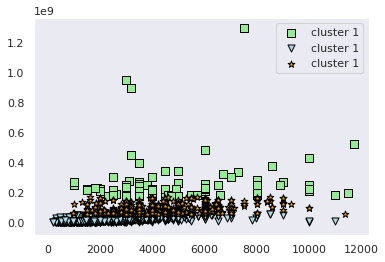

In [79]:
plt.scatter(
    df_houssize_price[y_km == 0]['House Size'],
    df_houssize_price[y_km == 0]['Price'],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='black',
    label='cluster 1'
)


plt.scatter(
    df_houssize_price[y_km == 1]['House Size'],
    df_houssize_price[y_km == 1]['Price'],
    s=50,
    c='lightblue',
    marker='v',
    edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    df_houssize_price[y_km == 2]['House Size'],
    df_houssize_price[y_km == 2]['Price'],
    s=50,
    c='orange',
    marker='*',
    edgecolor='black',
    label='cluster 1'
)


plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [80]:
df_houssize_price[y_km == 1].shape

(6838, 2)

In [66]:
import seaborn as sns

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


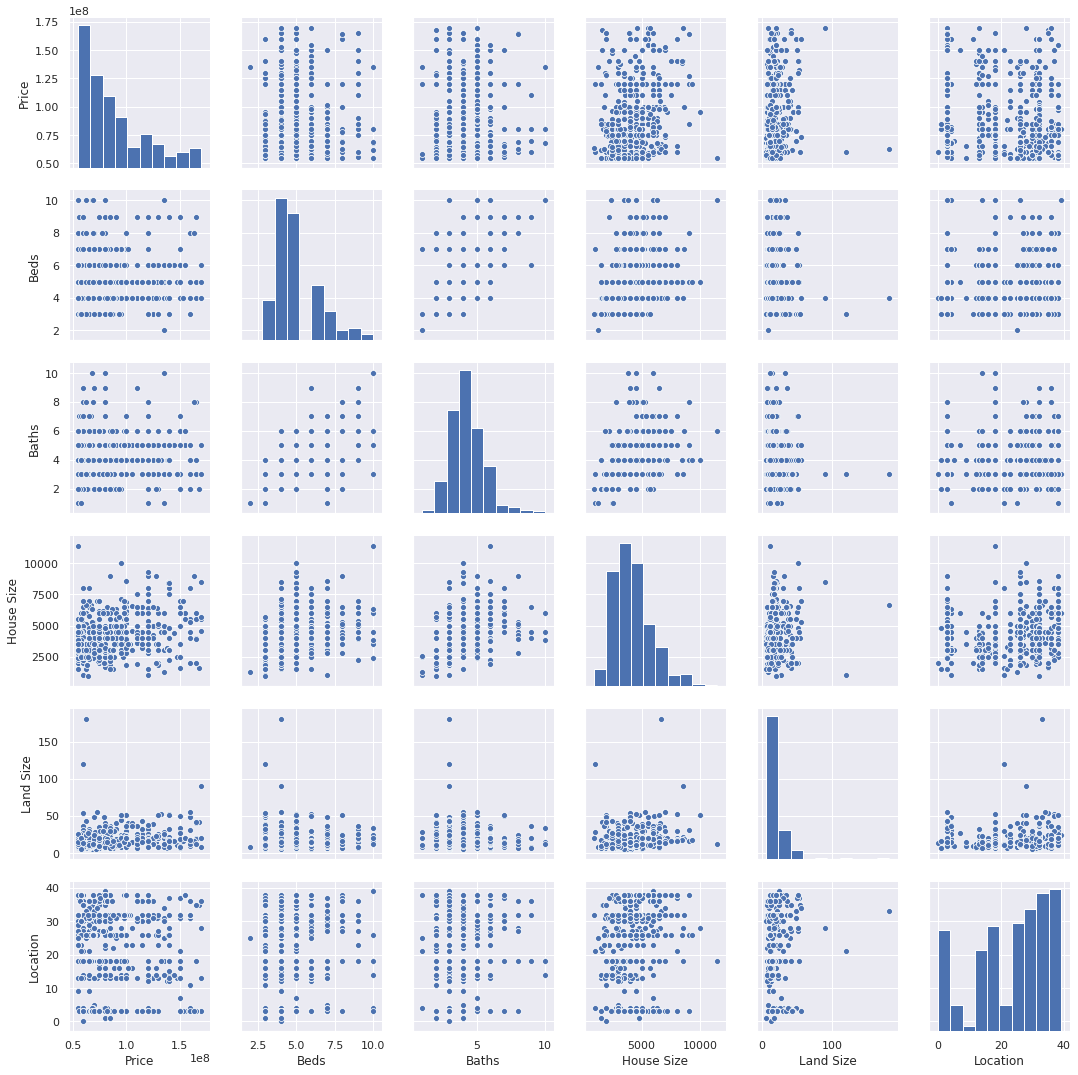

In [81]:
sns.set()
cols = ['Price', 'Beds', 'Baths', 'House Size', 'Land Size', 'Location']
sns.pairplot(df_temp[y_km == 2][cols], size = 2.5)
plt.show();

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [53]:
labelencoder = LabelEncoder()
df['Location'] = labelencoder.fit_transform(df['Location'])
# df['Location'].apply(lambda x: print(x))
df.head()

,Unnamed: 0,Location,Price,Beds,Baths,House Size,Land Size
0,0,35,12500000,4,2,1750.0,6.5
1,1,25,29500000,4,4,3510.0,9.0
2,2,28,19000000,4,3,2850.0,7.5
3,3,25,35000000,7,4,1700.0,15.0
4,4,4,29500000,5,4,3500.0,8.0


In [86]:
# X_train, X_test, Y_train, Y_test = train_test_split(
#     df[df['House Size'] < 12000].drop(columns=[ 'Price'],axis=1)[y_km == 2],
#     df[df['House Size'] < 12000]['Price'][y_km == 2],
#     test_size=0.25,
#     random_state=42
# )
X_train, X_test, Y_train, Y_test = train_test_split(
    df.loc[df_temp.index].drop(columns=[ 'Price'],axis=1)[y_km == 1],
    df.loc[df_temp.index]['Price'][y_km == 1],
    test_size=0.25,
    random_state=42
)

In [87]:
model = RandomForestRegressor(n_jobs=-1)

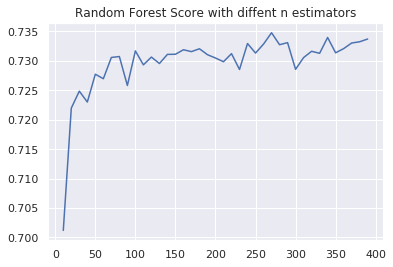

In [88]:
estimators = np.arange(10, 400, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title('Random Forest Score with diffent n estimators')
# 4
plt.plot(estimators, scores)

In [21]:
df.drop(columns=['Unnamed: 0', 'Price'],axis=1)[y_km == 2].shape

(6858, 5)

Try with 4 clusters

In [22]:
km = KMeans(
    n_clusters=4,
    init= 'random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
y_km = km.fit_predict(df_houssize_price)

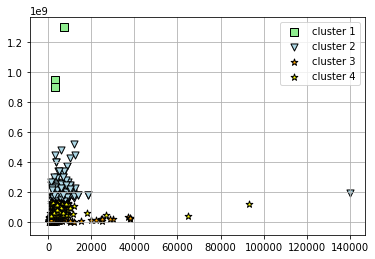

In [23]:
plt.scatter(
    df_houssize_price[y_km == 0]['House Size'],
    df_houssize_price[y_km == 0]['Price'],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='black',
    label='cluster 1'
)


plt.scatter(
    df_houssize_price[y_km == 1]['House Size'],
    df_houssize_price[y_km == 1]['Price'],
    s=50,
    c='lightblue',
    marker='v',
    edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    df_houssize_price[y_km == 2]['House Size'],
    df_houssize_price[y_km == 2]['Price'],
    s=50,
    c='orange',
    marker='*',
    edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    df_houssize_price[y_km == 3]['House Size'],
    df_houssize_price[y_km == 3]['Price'],
    s=50,
    c='yellow',
    marker='*',
    edgecolor='black',
    label='cluster 4'
)


plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [24]:
df_houssize_price[y_km == 3]['Price'].shape

(916,)

In [25]:
df_houssize_price[y_km == 2]['Price'].shape

(6510,)

In [26]:
df_houssize_price[y_km == 1]['Price'].shape

(180,)

In [27]:
df_houssize_price[y_km == 0]['Price'].shape

(3,)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop(columns=['Unnamed: 0', 'Price'],axis=1)[y_km == 2],
    df['Price'][y_km == 2],
    test_size=0.25,
    random_state=42
)

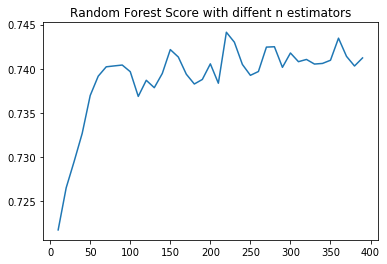

In [29]:
estimators = np.arange(10, 400, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title('Random Forest Score with diffent n estimators')
# 4
plt.plot(estimators, scores)

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop(columns=['Unnamed: 0', 'Price'],axis=1)[y_km == 3],
    df['Price'][y_km == 3],
    test_size=0.25,
    random_state=42
)

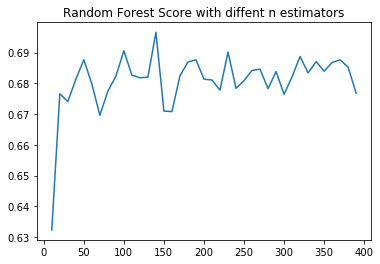

In [31]:
estimators = np.arange(10, 400, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title('Random Forest Score with diffent n estimators')
# 4
plt.plot(estimators, scores)

In [35]:
df.drop(columns=['Unnamed: 0', 'Price'],axis=1)[y_km == 2].describe()

,Location,Beds,Baths,House Size,Land Size
count,6510.000000,6510.000000,6510.000000,6510.000000,6510.000000
mean,25.285714,3.807373,2.970507,2474.159402,35.760909
std,11.602487,1.045621,1.102542,1532.677001,1984.500199
min,0.000000,1.000000,1.000000,174.240000,1.000000
25%,21.000000,3.000000,2.000000,1600.000000,7.300000
50%,28.000000,4.000000,3.000000,2480.000000,9.000000
75%,35.000000,4.000000,4.000000,3000.000000,10.300000
max,39.000000,10.000000,10.000000,38000.000000,160000.000000
